Image gradients, denoisy


In [99]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
from skimage import data
from skimage.color import rgb2gray
import copy as C

Read in an image. You can read in any image.  replace with any image of your choice below. 

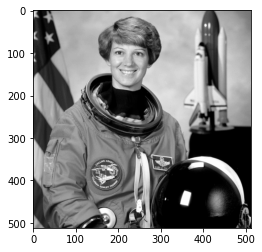

In [100]:
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')

### image derivative
###  set up filters
### take derivative

In [101]:
dx = np.array([1,-1])
s1 = np.array([1,1])
dy = np.array([1,-1])
s =s1[None,:]

print(dx, s1, dy, s)

[ 1 -1] [1 1] [ 1 -1] [[1 1]]


##Demo: convolve with the image using above filters
###hint: using convolve1d, first convolve in x directon and then in y. 

In [102]:
x = ndimage.convolve1d(img,dx,axis= 0)

gx_I = ndimage.convolve(x,s)

y = ndimage.convolve1d(img,dx,axis= 1)
gy_I = ndimage.convolve(y,s)
# alternative, you can use np.gradient()
gx_I,gy_I = np.gradient(img)[:2]

print(gx_I, gy_I)

[[23.24501    34.936996   50.33       ... -1.5159988   0.25
  -3.5270004 ]
 [23.215004   35.833      50.636      ...  0.2635002   0.9454994
  -1.6739998 ]
 [20.9785     33.1335     42.0635     ... -0.9730034   1.5
   0.8560028 ]
 ...
 [-0.6764984  -1.826004   -0.38899994 ...  0.057       0.443
   0.        ]
 [-1.4075012  -2.3720016  -2.1524963  ...  0.          0.443
   0.        ]
 [-0.6470032  -1.1029968  -3.2389984  ... -0.114       0.
   0.        ]] [[-42.360992   -42.518997   -24.966501   ...  -2.2335014   -0.87750244
    3.125     ]
 [-30.669006   -28.976501   -16.971      ...  -1.350502    -1.8830032
   -0.6520004 ]
 [-17.125      -15.098      -10.627998   ...  -0.788002    -2.8150024
   -2.1139984 ]
 ...
 [  0.11399841  -1.3775024   -3.201004   ...  -1.           0.
   -0.114     ]
 [ -1.3590088   -0.82649994  -4.7579956  ...  -9.715       -0.057
   -1.        ]
 [ -1.8150024   -2.1224976   -5.2579956  ... -31.316        0.
   -1.        ]]


## Exericse 1: image filtering
### Can you design a smooth gradient filter that just perform the convolution operation once and extracct the edge of the images?  Think of what type of filter it is. 
### plot the gradients images and the magnitudes, use subplot.


In [103]:
import cv2 
# reference: https://scipy-lectures.org/advanced/image_processing/#blurring-smoothing

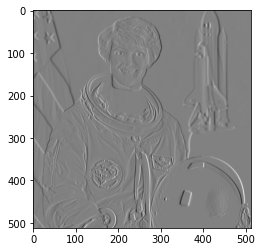

In [121]:
# X- derivative of Gaussian
Gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])/8
Edged_imgGx = cv2.filter2D(img, -1, Gx)
plt.figure()
plt.imshow(Edged_imgGx, cmap = "gray")

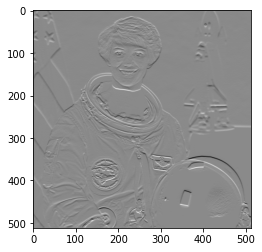

In [123]:
# Y_Derivative of Gaussian
Gy = np.array([[1,2,1] ,[0,0,0], [-1,-2,-1]])/8
Edged_imgGy = cv2.filter2D(img, -1, Gy)
plt.figure()
plt.imshow(Edged_imgGy, cmap = "gray")

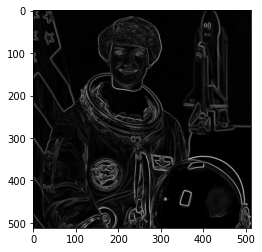

In [116]:
# magnitude
# reference: https://stackoverflow.com/questions/49732726/how-to-compute-the-gradients-of-image-using-python

# Perform x convolution
x = ndimage.convolve(img, Gx)
# Perform y convolution
y = ndimage.convolve(img, Gy)
sobel = np.hypot(x, y)
plt.imshow(sobel, cmap = plt.cm.gray)
plt.show()

# Exercise 2: Image De-noise. Add salt and pepper to the image 

In [58]:
noisy = img + 0.4 * img.std() * np.random.random(img.shape)
# # adding salt and peper noise to the image 
# # adding salt
num_salt = np.ceil(0.05 * img.size * 0.5)
coords = [np.random.randint(0, i - 1, int(num_salt))
                 for i in img.shape]
out=C.copy(img)  # replace 1              
out[coords] = 255
# # adding pepper
num_pepper = np.ceil(0.05* img.size * (1. - 0.05))
coords = [np.random.randint(0, i - 1, int(num_pepper))
                   for i in img.shape]
out[coords] = 0
out=out.reshape(img.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


Text(0.5, 1.0, 'added gaussian noise')

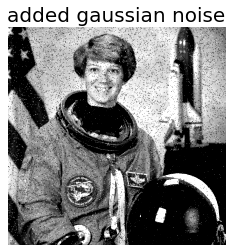

In [59]:
plt.figure()
plt.imshow(out, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('added gaussian noise', fontsize=20)

## gaussian denoise?
## can you remove the noise by using guassian filter? try also box filter and median filter. nd.gaussian_filter, etc. 
## plot the denoised image. Plot as subplots. 

## Guassian box filter

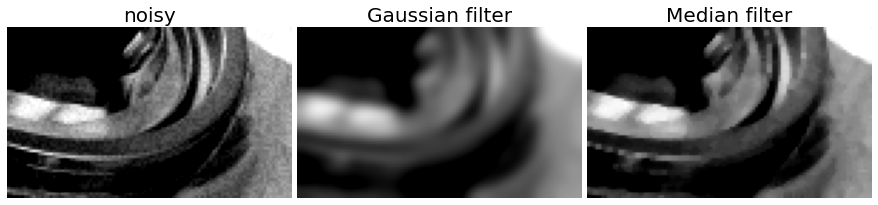

In [107]:
f = imageio.imread('imageio:astronaut.png',as_gray = True)
f = f[230:290, 220:320]

noisy = f + 0.4*f.std()*np.random.random(f.shape) #detecting the noise
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
med_denoised = ndimage.median_filter(noisy, 3)


plt.figure(figsize=(12,2.8))
plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)
plt.show()

# Exercise 3: 
a) Generate an image of a rotated rectangle. you can create a rectnagle by filling center pixels 1 and the rest zero. ndimage.rotate can be used to roate the image. 
b) Blur the image using a Guassian filter. 
c) apply sobel filter to both x and y directon
d) Display the original image, x-derivatives, y-derivatives. use np.hypot to compute the magnitude. 

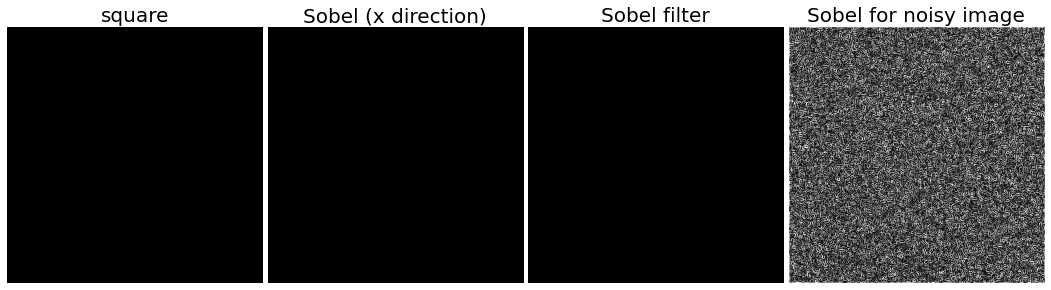

In [108]:
im = imageio.imread('imageio:astronaut.png', as_gray=True)
im = np.zeros((256,256));
im[64:64,64:-64] = 1

rotate_img = ndimage.rotate(im, 70, mode = "constant")
im = ndimage.gaussian_filter(im, 8)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im += 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)
plt.show()